In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import numpy as np
import autobmt

# 1. 读数据

In [4]:
data = pd.read_csv('/Users/ryanzheng/PycharmProjects/autobmt/examples/example_data/tutorial_data.csv')
print('Shape:',data.shape)
data.head(10)

Shape: (108940, 168)


,APP_ID_C,target,var_d1,var_d2,var_d3,var_d4,var_d5,var_d6,var_d7,var_d8,var_d9,var_d11,var_b1,var_b2,var_b3,var_b4,var_b5,var_b6,var_b7,var_b8,var_b9,var_b10,var_b11,var_b12,var_b13,var_b14,var_b15,var_b16,var_b17,var_b18,var_b19,var_b20,var_b21,var_b22,var_b23,var_b24,var_b25,var_b26,var_b27,var_b28,var_l_1,var_l_2,var_l_3,var_l_4,var_l_5,var_l_6,var_l_7,var_l_8,var_l_9,var_l_10,var_l_11,var_l_12,var_l_13,var_l_14,var_l_15,var_l_16,var_l_17,var_l_18,var_l_19,var_l_20,var_l_21,var_l_22,var_l_23,var_l_24,var_l_25,var_l_26,var_l_27,var_l_28,var_l_29,var_l_30,var_l_31,var_l_32,var_l_33,var_l_34,var_l_35,var_l_36,var_l_37,var_l_38,var_l_39,var_l_40,var_l_41,var_l_42,var_l_43,var_l_44,var_l_45,var_l_46,var_l_47,var_l_48,var_l_49,var_l_50,var_l_51,var_l_52,var_l_53,var_l_54,var_l_55,var_l_56,var_l_57,var_l_58,var_l_59,var_l_60,var_l_61,var_l_62,var_l_63,var_l_64,var_l_65,var_l_66,var_l_67,var_l_68,var_l_69,var_l_70,var_l_71,var_l_72,var_l_73,var_l_74,var_l_75,var_l_76,var_l_77,var_l_78,var_l_79,var_l_80,var_l_81,var_l_82,var_l_83,var_l_84,var_l_85,var_l_86,var_l_87,var_l_88,var_l_89,var_l_90,var_l_91,var_l_92,var_l_93,var_l_94,var_l_95,var_l_96,var_l_97,var_l_98,var_l_99,var_l_100,var_l_101,var_l_102,var_l_103,var_l_104,var_l_105,var_l_106,var_l_107,var_l_108,var_l_109,var_l_110,var_l_111,var_l_112,var_l_113,var_l_114,var_l_115,var_l_116,var_l_117,var_l_118,var_l_119,var_l_120,var_l_121,var_l_122,var_l_123,var_l_124,var_l_125,var_l_126,type,apply_time
0,app_1,0,Hit-6+ Vintage,816.0,RESIDENT INDIAN,Post-Graduate,M,RESIDENT INDIAN,SELF-EMPLOYED,Y,-11111,N,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-8888.000000,-9999,-8888,-8888,-8888,-8888,0,3,-9999,-9999,-999,-9999,-8888,-8888,0.632344,-8888,-8888,-8888,-8888,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,train,2019-03-01
1,app_2,0,NaN,841.0,RESIDENT INDIAN,Post-Graduate,F,RESIDENT INDIAN,SALARIED,N,-11111,N,-11111,-11111,-11111,-11111,-11111,-11111,-11111,-11111,-11111,-11111.000000,-11111,-11111,-11111,-11111,-11111,1,12,-999,2,1,-999,-11111,-11111,-11111.000000,-11111,-11111,-11111,-11111,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,train,2019-03-01
2,app_3,0,Hit-6+ Vintage,791.0,RESIDENT INDIAN,Post-Graduate,M,RESIDENT INDIAN,PROPRIETOR,Y,1,N,-8888,-8888,-8888,-8888,-999,-999,-999,-999,-8888,0.824694,8,-8888,-8888,-8888,-8888,2,9,1,3,1,-9999,-8888,-8888,0.824694,-8888,-8888,-8888,-8888,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.019300,0.000026,0.0,0.000045,0.0,0.004975,0.0,0.008,0.0,0.000775,0.00003,0.0,0.0,0.003663,0.00108

# 数据包含2019年5月 - 7月的数据。其中将用3月和4月数据用于训练样本，5月、6月、7月数据作为时间外样本（OOT）。

In [5]:
data['month'] = data['apply_time'].map(lambda x: x[:7])

In [6]:
print('month:',data.month.unique())

month: ['2019-03' '2019-04' '2019-05' '2019-06' '2019-07']


In [7]:
train = data.loc[data.month.isin(['2019-03','2019-04'])==True,:]
OOT = data.loc[data.month.isin(['2019-03','2019-04'])==False,:]

print('train size:',train.shape,'\nOOT size:',OOT.shape)

train size: (43576, 169) 
OOT size: (65364, 169)


# 2. EDA

In [8]:
autobmt.detect(train)[:10]

,var_name,type,size,missing,missing_q,unique,value_max_percent,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
0,APP_ID_C,object,43576,0.00%,0.000000,43576,0.000023,app_18113:0.00%,app_15040:0.00%,app_41534:0.00%,app_29315:0.00%,app_14630:0.00%,app_34776:0.00%,app_33000:0.00%,app_30208:0.00%,app_31392:0.00%,app_4572:0.00%
1,target,int64,43576,0.00%,0.000000,2,0.978681,0.021319,0.144447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,var_d1,object,43576,37.57%,0.375734,2,0.603245,Hit-6+ Vintage:60.32%,Hit-lt 6 Vinta:2.10%,None,None,None,None,None,None,Hit-6+ Vintage:60.32%,Hit-lt 6 Vinta:2.10%
3,var_d2,float64,43576,5.44%,0.054434,389,0.249220,570.491578,355.565339,-1.0,-1.0,-1.0,778.0,810.0,832.0,864.0,900.0
4,var_d3,object,43576,5.31%,0.053103,6,0.940013,RESIDENT INDIAN:94.00%,NON-RESIDENT INDIAN:0.64%,PRIVATE LTD COMPANIES:0.02%,PARTNERSHIP FIRM:0.02%,PUBLIC LTD COMPANIES:0.00%,NON-RESIDENT INDIAN:0.64%,PRIVATE LTD COMPANIES:0.02%,PARTNERSHIP FIRM:0.02%,PUBLIC LTD COMPANIES:0.00%,OVERSEAS CITIZEN OF INDIA:0.00%
5,var_d4,object,43576,1.08%,0.010786,5,0.553011,Graduate:55.30%,Post-Graduate:21.57%,Others:10.71%,Under Graduate:10.67%,Professional:0.67%,Graduate:55.30%,Post-Graduate:21.57%,Others:10.71%,Under Graduate:10.67%,Professional:0.67%
6,var_d5,object,43576,1.08%,0.010763,3,0.796998,M:79.70%,F:14.33%,O:4.89%,None,None,None,None,M:79.70%,F:14.33%,O:4.89%
7,var_d6,object,43576,1.08%,0.010763,13,0.933427,RESIDENT INDIAN:93.34%,PRIVATE LTD COMPANIES:2.57%,PARTNERSHIP FIRM:1.45%,PUBLIC LTD COMPANIES:0.73%,NON-RESIDENT INDIAN:0.64%,CO-OPERATIVE SOCIETIES:0.01%,LIMITED LIABILITY PARTNERSHIP:0.00%,TRUST-NGO:0.00%,ASSOCIATION:0.00%,OVERSEAS CITIZEN OF INDIA:0.00%
8,var_d7,object,43576,1.60%,0.016018,84,0.314256,SALARIED:31.43%,PROPRIETOR:31.31%,SELF-EMPLOYED:10.74%,OTHERS:6.40%,FIRST TIME USERS:2.72%,GARAGIST:0.00%,RETAIL BUS OPERATOR:0.00%,STOCKBROKER(S)-COMMD:0.00%,PRIVATE TAILOR:0.00%,NURSE:0.00%
9,var_d8,object,43576,1.08%,0.010763,2,0.598977,Y:59.90%,N:39.03%,None,None,None,None,None,None,Y:59.90%,N:39.03%


# 3. 高效分箱并进行特征筛选

# 3. autobmt.selection.select(dataframe, target=’target’, empty=0.9, iv=0.02, corr=0.7, return_drop=False, exclude=None):

In [9]:
exclude_cols = ['APP_ID_C','month','type','apply_time'] #去掉其它列
fs = autobmt.FeatureSelection(df=train, target='target',data_type='none', exclude_columns=exclude_cols)
df_selected, selected_features, select_log_df, fbfb = fs.select()

2023-11-12 16:04:32,940 - autobmt.feature_selection[line:540] - INFO: 开始进行前置检查
2023-11-12 16:04:32,941 - autobmt.feature_selection[line:545] - INFO: train、test数据集标识的字段名不存在！或未进行数据集的划分，筛选变量无法使用psi、iv_diff进行筛选，建议请将数据集划分为train、test!!!
2023-11-12 16:04:33,115 - autobmt.feature_selection[line:568] - INFO: 数值特征个数: 156
2023-11-12 16:04:33,116 - autobmt.feature_selection[line:569] - INFO: 字符特征个数: 8
2023-11-12 16:04:33,116 - autobmt.feature_selection[line:570] - INFO: 日期特征个数: 0
2023-11-12 16:04:33,117 - autobmt.feature_selection[line:572] - INFO: 数据集中包含有8个字符特征,0个日期特征
2023-11-12 16:04:33,118 - autobmt.feature_selection[line:472] - INFO: 开始执行特征选择模块... 数据集结构为[(43576, 169)]
2023-11-12 16:04:33,118 - autobmt.feature_selection[line:485] - INFO: 未指定筛选方法的阈值，使用默认方法和阈值：{'empty': {'threshold': 0.9}, 'iv': {'threshold': 0.02}, 'corr': {'threshold': 0.7}}
2023-11-12 16:04:33,168 - autobmt.feature_selection[line:511] - INFO: 删除变量 ：[]
2023-11-12 16:04:33,199 - autobmt.feature_selection[line:523] - INFO: empty 

In [10]:
print('保留的特征个数：',len(selected_features))
print('保留的特征：',selected_features)
print('筛选特征后的数据集：',df_selected.shape)
print('筛选过程日志：',select_log_df)

保留的特征个数： 33
保留的特征： ['var_d1', 'var_d2', 'var_d3', 'var_d4', 'var_d5', 'var_d6', 'var_d7', 'var_d8', 'var_d11', 'var_b11', 'var_b15', 'var_b17', 'var_b18', 'var_b19', 'var_b20', 'var_b21', 'var_b22', 'var_b24', 'var_l_9', 'var_l_19', 'var_l_20', 'var_l_40', 'var_l_50', 'var_l_52', 'var_l_58', 'var_l_60', 'var_l_64', 'var_l_66', 'var_l_68', 'var_l_89', 'var_l_91', 'var_l_119', 'var_l_123']
筛选特征后的数据集： (43576, 38)
筛选过程日志：        feature cn  miss_rate  empty_selection_feature_flag (>0.9)        IV  \
0       var_d1      0.375734                                    0  0.028056   
1       var_d2      0.054434                                    0  0.366359   
2       var_d3      0.053103                                    0  0.071922   
3       var_d4      0.010786                                    0  0.034812   
4       var_d5      0.010763                                    0  0.067966   
..         ... ..        ...                                  ...       ...   
159  var_l_122      0.000

In [11]:
select_log_df.to_csv('tutorial_code_select_log_df.csv', index=False)

# 3.2 分箱

In [12]:
%%time
# 初始化
fb = autobmt.transformer.FeatureBin()

# 使用特征筛选后的数据进行训练：使用稳定的卡方分箱，规定每箱至少有5%数据, 空值将自动被归到为1箱。
fb.fit(df_selected.drop(exclude_cols, axis=1), y = 'target', method = 'chi', min_sample_rate = 0.05, is_need_monotonic=False)

# 仅展示部分分箱
print('var_d2:',fb.export()['var_d2'])
print('var_d5:',fb.export()['var_d5'])
print('var_d6:',fb.export()['var_d6'])

print('===========分割点===========')
# 仅展示部分分箱
print('var_d2:',fb.splits_dict['var_d2'])
print('var_d5:',fb.splits_dict['var_d5'])
print('var_d6:',fb.splits_dict['var_d6'])

var_d2: ['0.[-inf ~ 747.0)', '1.[747.0 ~ 782.0)', '2.[782.0 ~ 820.0)', '3.[820.0 ~ inf)', '4.nan']
var_d5: ['0.O,F', '1.M', '2.nan']
var_d6: ['0.PUBLIC LTD COMPANIES,NON-RESIDENT INDIAN,PRIVATE LTD COMPANIES,PARTNERSHIP FIRM', '1.RESIDENT INDIAN,TRUST,TRUST-CLUBS/ASSN/SOC/SEC-25 CO.,HINDU UNDIVIDED FAMILY,CO-OPERATIVE SOCIETIES,LIMITED LIABILITY PARTNERSHIP,ASSOCIATION,OVERSEAS CITIZEN OF INDIA,TRUST-NGO', '2.nan']
===========分割点===========
var_d2: [747. 782. 820.  nan]
var_d5: [list(['O', 'F']) list(['M']) list(['nan'])]
var_d6: [list(['PUBLIC LTD COMPANIES', 'NON-RESIDENT INDIAN', 'PRIVATE LTD COMPANIES', 'PARTNERSHIP FIRM'])
 list(['RESIDENT INDIAN', 'TRUST', 'TRUST-CLUBS/ASSN/SOC/SEC-25 CO.', 'HINDU UNDIVIDED FAMILY', 'CO-OPERATIVE SOCIETIES', 'LIMITED LIABILITY PARTNERSHIP', 'ASSOCIATION', 'OVERSEAS CITIZEN OF INDIA', 'TRUST-NGO'])
 list(['nan'])]
CPU times: user 166 ms, sys: 119 ms, total: 285 ms
Wall time: 9.82 s


# 3.3 观察并手动调整分箱：fb.manual_bin(dict)

## 3.3.1 观察分箱

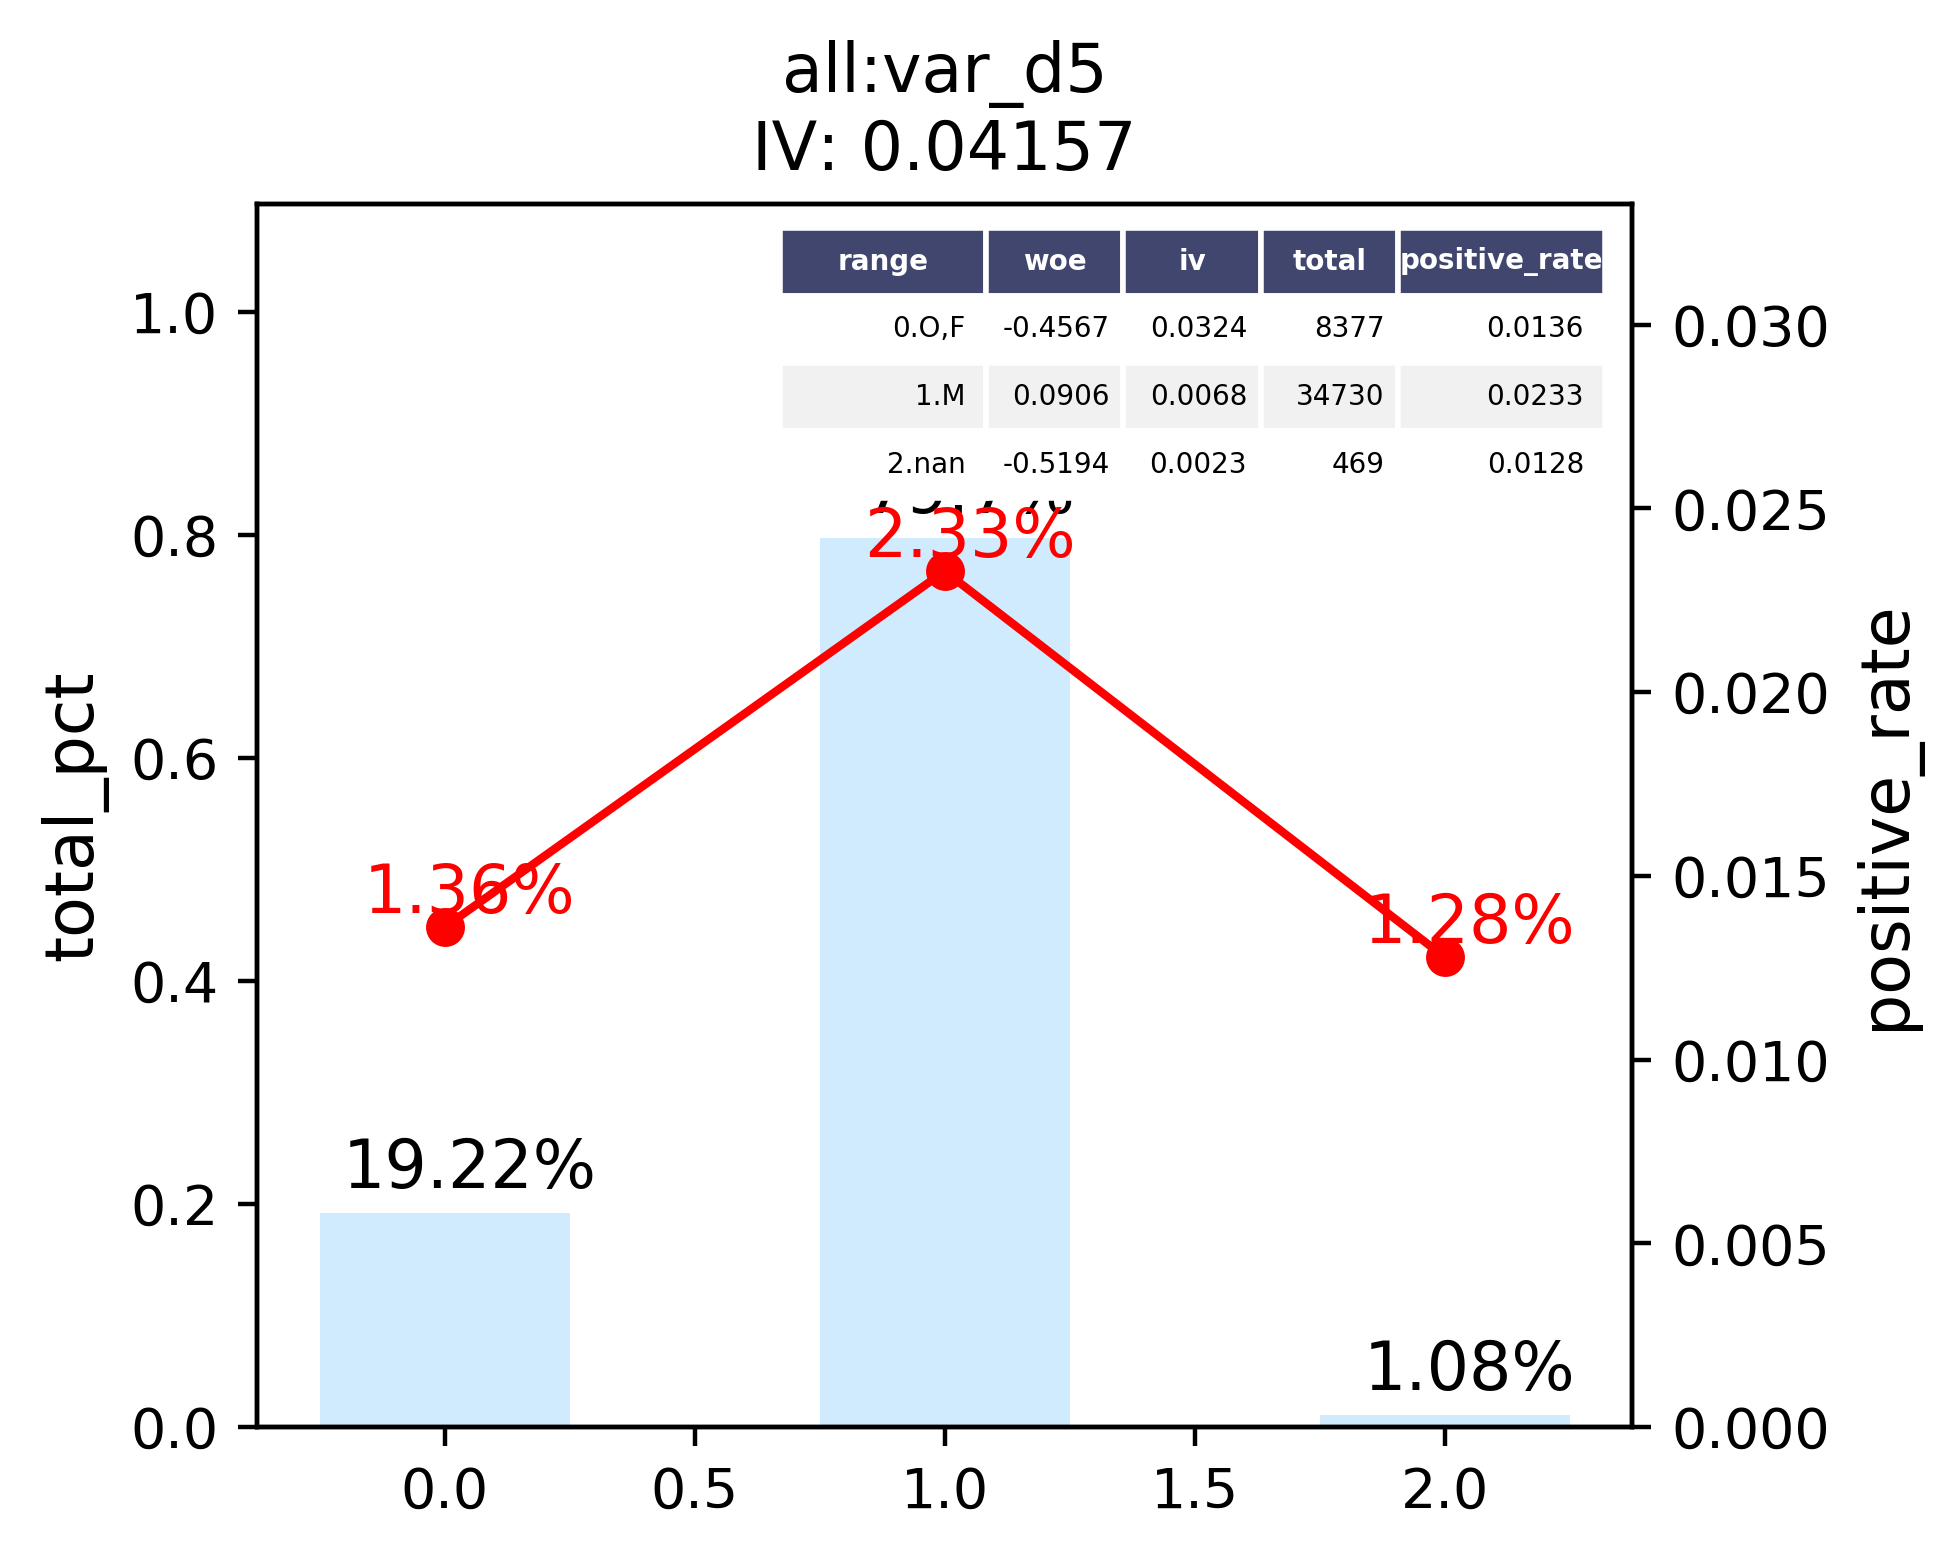

In [13]:
from autobmt.plot import plot_var_bin_summary

# 看'var_d5'在时间内的分箱
col = 'var_d5'

plot_var_bin_summary(fb.transform(df_selected[[col,'target']], labels=True), cols=col)


## 3.3.2 调整分箱

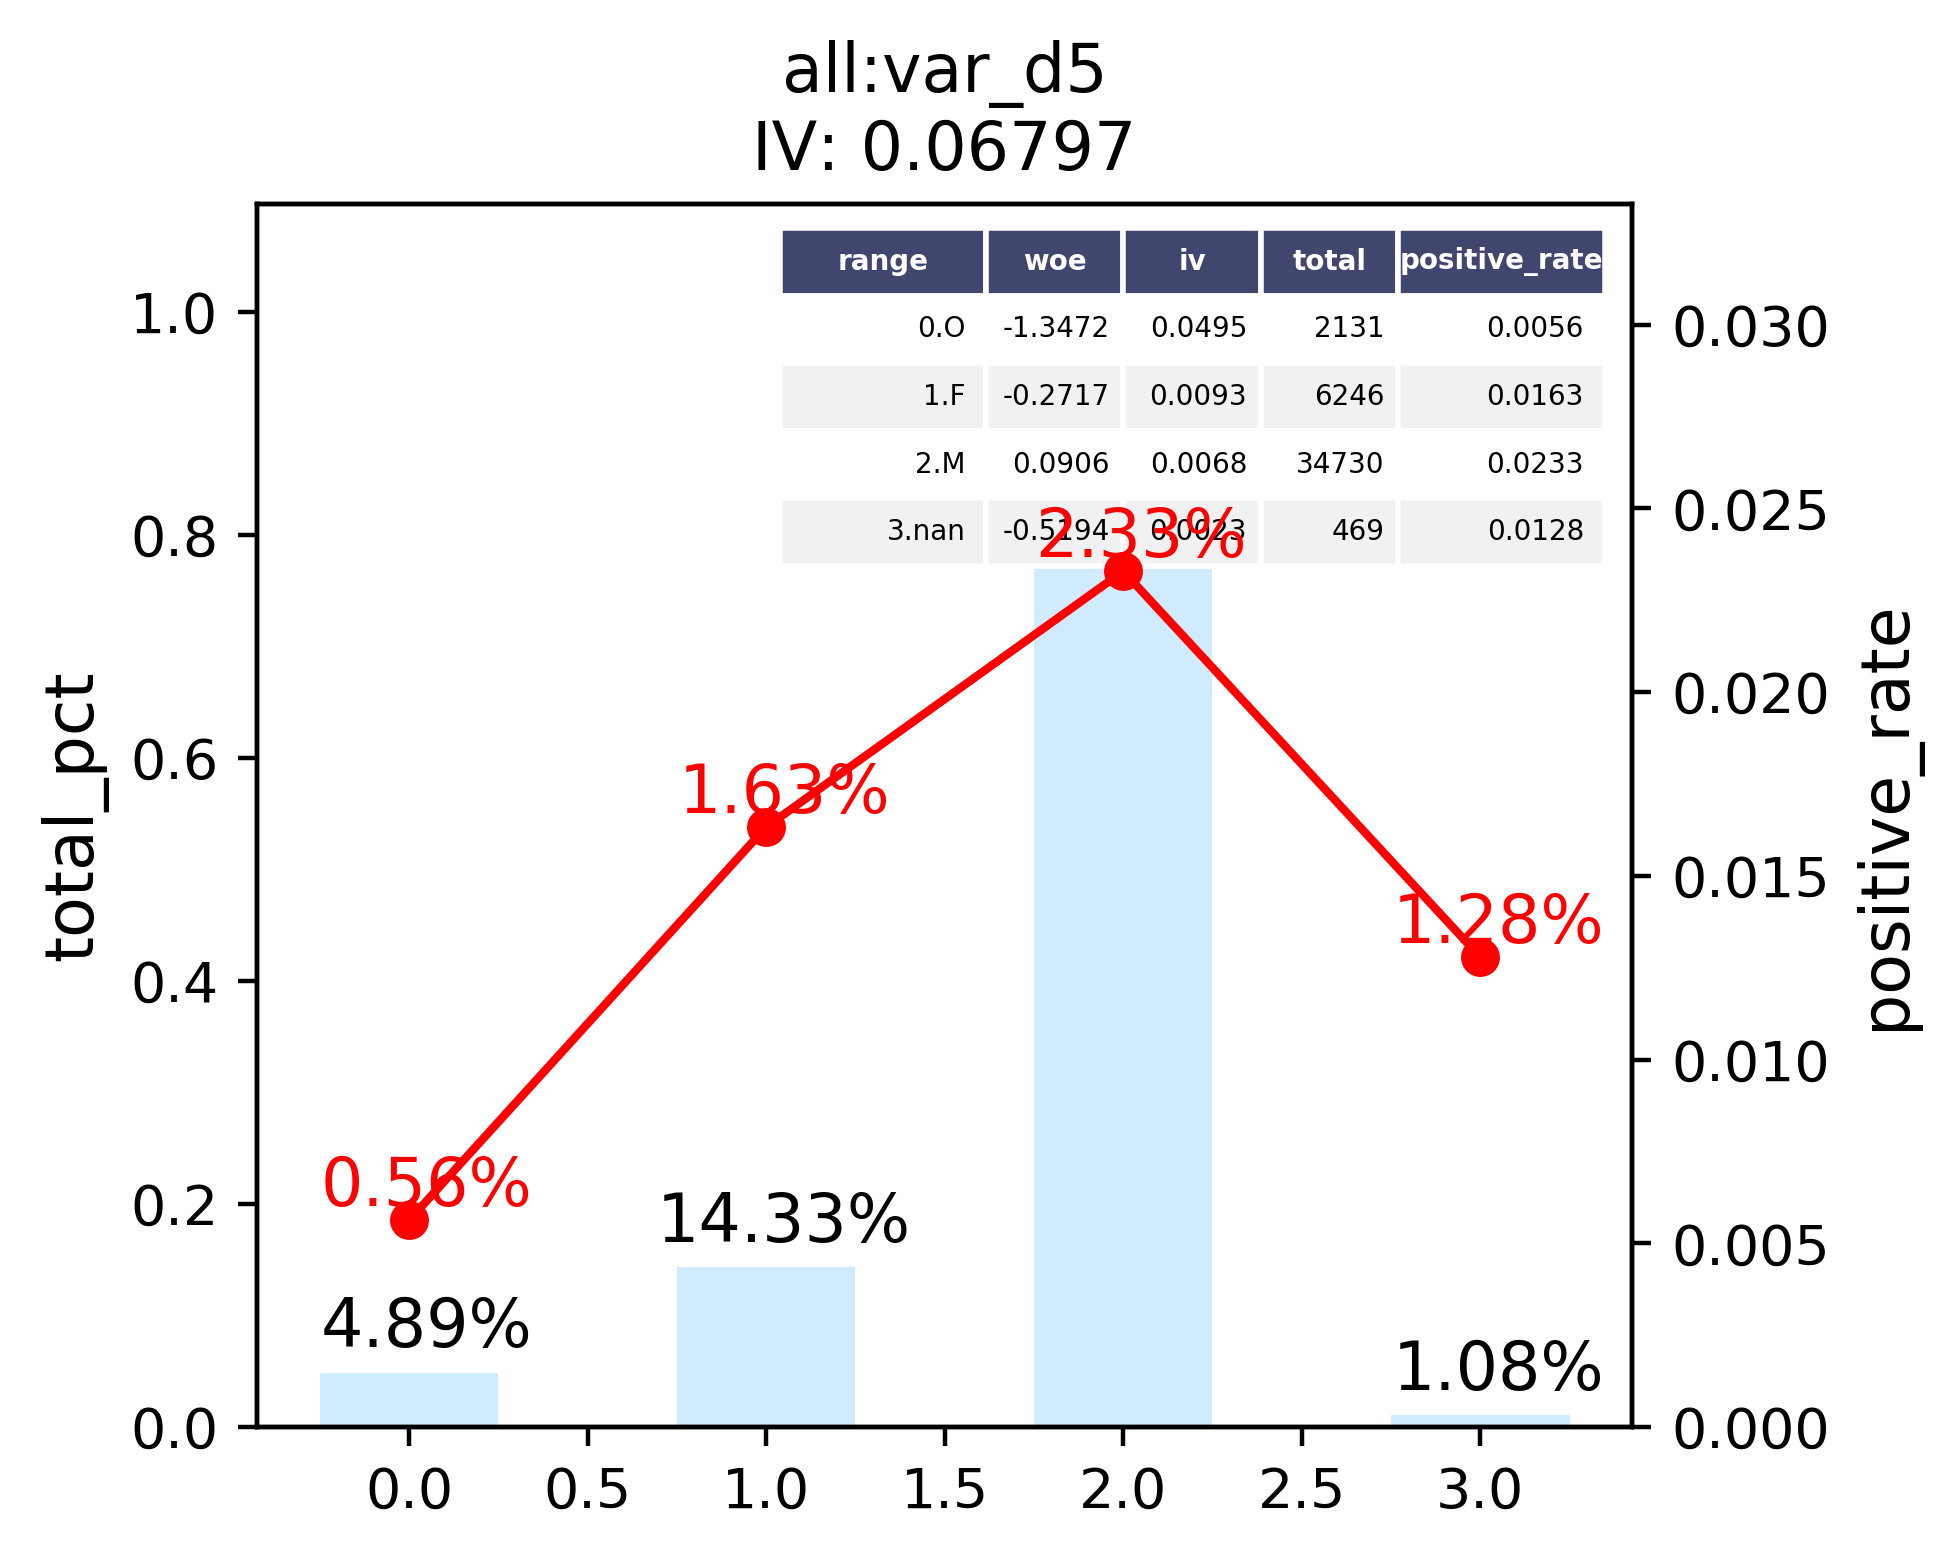

In [14]:
# iv值较低，假设我们要 'F' 淡出分出一组来提高iv

#设置分组
rule = {'var_d5':[['O'],['F'], ['M'], ['nan']]}

#调整分箱
fb.manual_bin(rule)

#查看手动分箱后稳定性
plot_var_bin_summary(fb.transform(df_selected[[col,'target']], labels=True), cols='var_d5')

In [15]:
#设置分组
rule = {'var_d5':[['O','F'], ['M'], ['nan']]}
#调整分箱
fb.manual_bin(rule)

## 3.3.3 查看特征分箱后详情，如：好坏比、ks、woe、iv等

In [16]:
from autobmt import calc_var_summary
train_var_summary = calc_var_summary(fb.transform(df_selected)[selected_features + ['target']], fb.export(),
                                             target='target')
train_var_summary

,range,var_name,min,max,positive,negative,total,positive_rate,negative_rate,odds,positive_pct,negative_pct,total_pct,cum_negative_pct,cum_total_pct,cum_positive_pct,cum_positive_rate,ks,lift,cum_lift,woe,iv,IV,range_num
0,0.[-inf ~ 1.0),var_d1,0,0,505,26698,27203,0.018564,0.981436,0.018915,0.543595,0.626023,0.624266,1.000000,1.000000,1.000000,0.021319,0.082428,0.870776,1.000000,-0.141182,0.011637,0.028056,0
1,1.[1.0 ~ inf),var_d1,1,1,424,15949,16373,0.025896,0.974104,0.026585,0.456405,0.373977,0.375734,0.373977,0.375734,0.456405,0.025896,-0.000000,1.214701,1.214701,0.199186,0.016418,0.028056,1
0,0.[-inf ~ 1.0),var_d2,0,0,433,14756,15189,0.028507,0.971493,0.029344,0.466093,0.346003,0.348563,0.346003,0.348563,0.466093,0.028507,0.120089,1.337182,1.337182,0.297936,0.035779,0.320862,0
1,1.[1.0 ~ 2.0),var_d2,1,1,226,6348,6574,0.034378,0.965622,0.035602,0.243272,0.148850,0.150863,0.494853,0.499426,0.709365,0.030281,0.214512,1.612540,1.420360,0.491243,0.046384,0.320862,1
2,2.[2.0 ~ 3.0),var_d2,2,2,216,11851,12067,0.017900,0.982100,0.018226,0.232508,0.277886,0.276918,0.772739,0.776345,0.941873,0.025865,0.169134,0.839626,1.213215,-0.178286,0.008090,0.320862,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1.[1.0 ~ 2.0),var_l_119,1,1,70,7199,7269,0.009630,0.990370,0.009724,0.075350,0.168804,0.166812,0.281473,0.281049,0.261572,0.019842,0.073553,0.451705,0.930697,-0.806599,0.075380,0.112883,1
2,2.[2.0 ~ inf),var_l_119,2,2,173,4805,4978,0.034753,0.965247,0.036004,0.186222,0.112669,0.114237,0.112669,0.114237,0.186222,0.034753,-0.000000,1.630132,1.630132,0.502483,0.036959,0.112883,2
0,0.[-inf ~ 1.0),var_l_123,0,0,673,28310,28983,0.023221,0.976779,0.023773,0.724435,0.663822,0.665114,0.663822,0.665114,0.724435,0.023221,0.060613,1.089189,1.089189,0.087378,0.005296,0.094210,0
1,1.[1.0 ~ 2.0),var_l_123,1,1,90,8590,8680,0.010369,0.989631,0.010477,0.096878,0.201421,0.199192,0.865243,0.864306,0.821313,0.020259,-0.043929,0.486356,0.950257,-0.731941,0.076519,0.094210,1


# 4. WOE转化

In [17]:
%%time
# 初始化
transer = autobmt.WoeTransformer()

# fb.transform() & transer.fit_transform() 转化训练数据，并去掉target列
train_woe = transer.fit_transform(fb.transform(df_selected), df_selected['target'], exclude=exclude_cols+['target'])
OOT_woe = transer.transform(fb.transform(OOT))

print(train_woe.head(2))

  APP_ID_C  target    var_d1    var_d2    var_d3    var_d4    var_d5  \
0    app_1       0 -0.141182 -0.178286  0.040255 -0.315451  0.090613   
1    app_2       0  0.199186 -1.410248  0.040255 -0.315451 -0.456741   

     var_d6    var_d7    var_d8   var_d11   var_b11   var_b15  var_b17  \
0  0.047145  0.365305 -0.140220 -0.152228 -0.237656 -0.639884      0.0   
1  0.047145 -0.726954  0.193594 -0.152228  0.199186  0.209948      0.0   

    var_b18   var_b19   var_b20   var_b21   var_b22   var_b24   var_l_9  \
0 -0.117058 -0.358365 -0.734605 -0.121860 -0.243476 -0.022264  0.033662   
1 -0.117058 -0.358365  0.228970 -0.318066  0.123885 -0.022264  0.033662   

   var_l_19  var_l_20  var_l_40  var_l_50  var_l_52  var_l_58  var_l_60  \
0  0.100105 -0.013857  0.027322  0.064735  0.114195  0.111096   0.13217   
1  0.100105 -0.013857  0.027322  0.064735  0.114195  0.111096   0.13217   

   var_l_64  var_l_66  var_l_68  var_l_89  var_l_91  var_l_119  var_l_123  \
0  0.080656   0.06406  0.091919

# 5. stepwise

In [18]:
# 将woe转化后的数据做逐步回归
final_data = autobmt.stepwise(train_woe,target = 'target', estimator='ols', direction = 'both', criterion = 'aic', exclude = exclude_cols)

# 将选出的变量应用于test/OOT数据
final_OOT = OOT_woe[final_data.columns]

print(final_data.shape) # 逐步回归从33个变量中选出了11个

(43576, 16)


In [19]:
# 确定建模要用的变量
col = list(final_data.drop(exclude_cols+['target'],axis=1).columns)
len(col)

11

## 查看特征的psi，输出每列特征的PSI，可以用于检验WOE转化后的特征稳定性
autobmt.psi(df_no_base, df_base)

In [20]:
autobmt.psi(final_OOT[col], final_data[col])

var_d2      0.000263
var_d5      0.000005
var_d7      0.000034
var_d11     0.000191
var_b11     0.000103
var_b18     0.000026
var_b19     0.000049
var_b22     0.000037
var_b24     0.000010
var_l_20    0.000115
var_l_68    0.000213
Name: psi, dtype: float64

# 6. 用逻辑回归建模

In [21]:
# 用逻辑回归建模
from sklearn.linear_model import LogisticRegression

while True:  # 循环的目的是保证入模变量的系数都为整
    lr = LogisticRegression()
    lr.fit(final_data[col], final_data['target'])
    drop_var = np.array(col)[np.where(lr.coef_ < 0)[1]]
    if len(drop_var) == 0:
        break
    col = list(set(col) - set(drop_var))
print('最终入模变量个数：',len(col),'\n入模变量：',col)

# 预测训练和隔月的OOT
final_data['p'] = lr.predict_proba(final_data[col])[:,1]

pred_OOT_may =lr.predict_proba(final_OOT.loc[final_OOT.month == '2019-05',col])[:,1]
pred_OOT_june =lr.predict_proba(final_OOT.loc[final_OOT.month == '2019-06',col])[:,1]
pred_OOT_july =lr.predict_proba(final_OOT.loc[final_OOT.month == '2019-07',col])[:,1]

最终入模变量个数： 11 
入模变量： ['var_d2', 'var_d5', 'var_d7', 'var_d11', 'var_b11', 'var_b18', 'var_b19', 'var_b22', 'var_b24', 'var_l_20', 'var_l_68']


## 6.1 模型评估

In [22]:
from autobmt import get_ks, get_auc

print('train KS',get_ks(final_data['target'], final_data['p']))
print('train AUC',get_auc(final_data['target'], final_data['p']))
print('OOT结果')
print('5月 KS',get_ks(final_OOT.loc[final_OOT.month == '2019-05','target'], pred_OOT_may))
print('6月 KS',get_ks(final_OOT.loc[final_OOT.month == '2019-06','target'], pred_OOT_june))
print('7月 KS',get_ks(final_OOT.loc[final_OOT.month == '2019-07','target'], pred_OOT_july))

# train KS 0.3756802628068211
# train AUC 0.7511403790644923
# OOT结果
# 5月 KS 0.38403399042558517
# 6月 KS 0.3564957061359582
# 7月 KS 0.38620741902325834

train KS 0.3756802628068211
train AUC 0.7511403790644923
OOT结果
5月 KS 0.38403399042558517
6月 KS 0.3564957061359582
7月 KS 0.38620741902325834


# 6.2 查看模型概率的psi

In [23]:
print(autobmt.psi(final_data['p'],pred_OOT_may))
print(autobmt.psi(final_data['p'],pred_OOT_june))
print(autobmt.psi(final_data['p'],pred_OOT_june))

0.14008457550241749
0.14560835875192432
0.14560835875192432


## 6.3 模型预测的概率分箱后信息，可应用于策略，有：概率区间，样本量，坏账率，ks，lift，iv等

In [24]:
autobmt.calc_bin_summary(final_data, bin_col='p',target='target')

,range,var_name,min,max,positive,negative,total,positive_rate,negative_rate,odds,positive_pct,negative_pct,total_pct,cum_negative_pct,cum_total_pct,cum_positive_pct,cum_positive_rate,ks,lift,cum_lift,woe,iv,IV,range_num
0,9.[0.04489865711062487 ~ inf),p,0.044899,0.383093,320,4041,4361,0.073378,0.926622,0.079188,0.344456,0.094755,0.100078,0.094755,0.100078,0.344456,0.073378,0.249702,3.441879,3.441879,1.290677,0.322284,0.914431,9
1,8.[0.0324190922308802 ~ 0.04489865711062487),p,0.032419,0.044892,171,4194,4365,0.039175,0.960825,0.040773,0.184069,0.098342,0.100170,0.193097,0.200248,0.528525,0.056269,0.335428,1.837568,2.639356,0.626857,0.053738,0.914431,8
2,7.[0.025990427073891872 ~ 0.0324190922308802),p,0.025990,0.032413,113,4247,4360,0.025917,0.974083,0.026607,0.121636,0.099585,0.100055,0.292682,0.300303,0.650161,0.046156,0.357480,1.215692,2.165019,0.200023,0.004411,0.914431,7
3,6.[0.019493214038111856 ~ 0.025990427073891872),p,0.019493,0.025972,115,4652,4767,0.024124,0.975876,0.024721,0.123789,0.109082,0.109395,0.401763,0.409698,0.773950,0.040273,0.372187,1.131578,1.889076,0.126483,0.001860,0.914431,6
4,5.[0.014322256189578822 ~ 0.019493214038111856),p,0.014322,0.019493,72,4054,4126,0.017450,0.982550,0.017760,0.077503,0.095059,0.094685,0.496823,0.504383,0.851453,0.035989,0.354630,0.818531,1.688108,-0.204190,0.003585,0.914431,5
5,4.[0.011063498772759067 ~ 0.014322256189578822),p,0.011063,0.014315,50,4124,4174,0.011979,0.988021,0.012124,0.053821,0.096701,0.095787,0.593524,0.600170,0.905274,0.032157,0.311751,0.561887,1.508364,-0.585952,0.025125,0.914431,4
6,3.[0.008110192312949157 ~ 0.011063498772759067),p,0.008110,0.011057,30,4370,4400,0.006818,0.993182,0.006865,0.032293,0.102469,0.100973,0.695993,0.701143,0.937567,0.028508,0.241575,0.319816,1.337199,-1.154717,0.081034,0.914431,3
7,2.[0.005379878739943169 ~ 0.008110192312949157),p,0.005380,0.008109,29,4280,4309,0.006730,0.993270,0.006776,0.031216,0.100359,0.098885,0.796351,0.800028,0.968784,0.025816,0.172432,0.315684,1.210938,-1.167809,0.080745,0.914431,2
8,1.[0.0034238134017440256 ~ 0.005379878739943169),p,0.003427,0.005379,20,4336,4356,0.004591,0.995409,0.004613,0.021529,0.101672,0.099963,0.898023,0.899991,0.990312,0.023459,0.092289,0.215364,1.100358,-1.552372,0.124412,0.914431,1
9,0.[-inf ~ 0.0034238134017440256),p,0.000368,0.003421,9,4349,4358,0.002065,0.997935,0.002069,0.009688,0.101977,0.100009,1.000000,1.000000,1.000000,0.021319,0.000000,0.096869,1.000000,-2.353873,0.217236,0.914431,0


## 6.4 模型概率值转标准分

In [25]:
final_data['score'] = final_data['p'].map(autobmt.to_score)
final_data.head(3)

,APP_ID_C,target,var_d2,var_d5,var_d7,var_d11,var_b11,var_b18,var_b19,var_b22,var_b24,var_l_20,var_l_68,type,apply_time,month,p,score
0,app_1,0,-0.178286,0.090613,0.365305,-0.152228,-0.237656,-0.117058,-0.358365,-0.243476,-0.022264,-0.013857,0.091919,train,2019-03-01,2019-03,0.010948,730
1,app_2,0,-1.410248,-0.456741,-0.726954,-0.152228,0.199186,-0.117058,-0.358365,0.123885,-0.022264,-0.013857,0.091919,train,2019-03-01,2019-03,0.002840,827
2,app_3,0,-0.178286,0.090613,0.365305,-0.152228,0.453002,-0.117058,-0.358365,-0.243476,0.175490,-0.013857,-0.883896,train,2019-03-01,2019-03,0.010136,735


### 6.4.1 标准分分箱后信息，可应用于策略，有：概率区间，样本量，坏账率，ks，lift，iv等

In [26]:
autobmt.calc_bin_summary(final_data, bin_col='score',target='target',is_sort=False)

,range,var_name,min,max,positive,negative,total,positive_rate,negative_rate,odds,positive_pct,negative_pct,total_pct,cum_negative_pct,cum_total_pct,cum_positive_pct,cum_positive_rate,ks,lift,cum_lift,woe,iv,IV,range_num
0,0.[-inf ~ 625.0),score,439,624,318,3974,4292,0.074091,0.925909,0.080020,0.342304,0.093184,0.098495,0.093184,0.098495,0.342304,0.074091,0.249120,3.475354,3.475354,1.301126,0.324137,0.917816,0
1,1.[625.0 ~ 650.0),score,625,649,171,4238,4409,0.038784,0.961216,0.040349,0.184069,0.099374,0.101180,0.192558,0.199674,0.526372,0.056200,0.333815,1.819230,2.636157,0.616420,0.052208,0.917816,1
2,2.[650.0 ~ 666.0),score,650,665,114,4188,4302,0.026499,0.973501,0.027221,0.122713,0.098202,0.098724,0.290759,0.298398,0.649085,0.046374,0.358326,1.242986,2.175231,0.222823,0.005462,0.917816,2
3,3.[666.0 ~ 687.0),score,666,686,92,4156,4248,0.021657,0.978343,0.022137,0.099031,0.097451,0.097485,0.388210,0.395883,0.748116,0.040288,0.359906,1.015863,1.889741,0.016084,0.000025,0.917816,3
4,4.[687.0 ~ 710.0),score,687,709,91,4307,4398,0.020691,0.979309,0.021128,0.097955,0.100992,0.100927,0.489202,0.496810,0.846071,0.036307,0.356869,0.970550,1.703007,-0.030534,0.000093,0.917816,4
5,5.[710.0 ~ 729.0),score,710,728,55,4377,4432,0.012410,0.987590,0.012566,0.059203,0.102633,0.101707,0.591835,0.598518,0.905274,0.032246,0.313439,0.582096,1.512528,-0.550182,0.023894,0.917816,5
6,6.[729.0 ~ 751.0),score,729,750,22,3989,4011,0.005485,0.994515,0.005515,0.023681,0.093535,0.092046,0.685371,0.690564,0.928956,0.028679,0.243585,0.257277,1.345214,-1.373650,0.095955,0.917816,6
7,7.[751.0 ~ 781.0),score,751,780,37,4680,4717,0.007844,0.992156,0.007906,0.039828,0.109738,0.108248,0.795109,0.798811,0.968784,0.025855,0.173675,0.367932,1.212782,-1.013532,0.070856,0.917816,7
8,8.[781.0 ~ 814.0),score,781,813,20,4360,4380,0.004566,0.995434,0.004587,0.021529,0.102235,0.100514,0.897343,0.899325,0.990312,0.023476,0.092969,0.214184,1.101172,-1.557892,0.125731,0.917816,8
9,9.[814.0 ~ inf),score,814,975,9,4378,4387,0.002052,0.997948,0.002056,0.009688,0.102657,0.100675,1.000000,1.000000,1.000000,0.021319,0.000000,0.096229,1.000000,-2.360519,0.219455,0.917816,9


# 7. 统计入模变量相关信息，如：系数，p值，t值，vif，iv，psi，缺失率

In [27]:
psi_v = autobmt.psi(train_woe[col], OOT_woe[col])
psi_v.name = 'train_test_psi'
train_iv = train_var_summary[['var_name', 'IV']].rename(columns={'IV': 'train_iv'}).drop_duplicates().set_index(
    'var_name')
test_iv = train_var_summary[['var_name', 'IV']].rename(columns={'IV': 'test_iv'}).drop_duplicates().set_index(
    'var_name')
var_miss = select_log_df[['feature', 'cn', 'miss_rate']].drop_duplicates().set_index('feature')

coef_s = {}
for idx, key in enumerate(col):
    coef_s[key] = lr.coef_[0][idx]
var_coef = pd.Series(coef_s, name='coef')
var_vif = autobmt.get_vif(final_data[col])
statsm = autobmt.StatsModel(estimator='ols', intercept=True)
t_p_c_value = statsm.stats(final_data[col], final_data['target'])
p_value = pd.Series(t_p_c_value['p_value'], name='p_value')
t_value = pd.Series(t_p_c_value['t_value'], name='t_value')

var_info = pd.concat([var_coef, p_value, t_value, var_vif, train_iv, test_iv, psi_v, var_miss],
                         axis=1).dropna(subset=['coef'])
print('模型截距：',lr.intercept_[0])
var_info 

模型截距： -3.833522889351234


,coef,p_value,t_value,vif,train_iv,test_iv,train_test_psi,cn,miss_rate
var_d2,0.733823,4.743542e-18,8.663152,1.180765,0.320862,0.320862,0.000263,,0.054434
var_d5,0.686785,1.947316e-06,4.759462,1.090034,0.038446,0.038446,0.000005,,0.010763
var_d7,0.704078,2.436844e-17,8.474351,1.114386,0.207174,0.207174,0.000034,,0.016018
var_d11,0.897302,9.324294e-24,10.054417,1.079282,0.108995,0.108995,0.000191,,0.000000
var_b11,0.516235,2.594739e-04,3.653024,1.232029,0.112845,0.112845,0.000103,,0.000000
var_b18,0.636135,3.924099e-11,6.608608,1.157381,0.000000,0.000000,0.000026,,0.000000
var_b19,0.658623,2.344575e-12,7.014304,1.165746,0.147523,0.147523,0.000049,,0.000000
var_b22,1.268975,5.810922e-07,4.998142,1.567244,0.030087,0.030087,0.000037,,0.000000
var_b24,2.030654,2.915887e-06,4.677271,1.274695,0.003906,0.003906,0.000010,,0.000000
var_l_20,0.974403,6.219273e-06,4.519350,1.014357,0.000878,0.000878,0.000115,,0.000000


# 8. ScoreCard

In [28]:
card = autobmt.ScoreCard(
    combiner = fb,
    transer = transer,
    #class_weight = 'balanced',
    #C=0.1,
    #base_score = 600,
    #odds = 15 ,
    #pdo = 50,
    #rate = 2
)
card.fit(final_data[col], final_data['target'])

ScoreCard(card={'var_b11': {'bins': array([-9999,     1,    52]),
                            'scores': array([54.50860959, 70.77593349, 45.05686182, 86.87080081]),
                            'weight': 0.5162347153417548,
                            'woes': [0.1991855165646647, -0.23765646087901432,
                                     0.4530023222942999, -0.6698672974092893]},
                'var_b18': {'bins': array([2]),
                            'scores': array([67.29748845, 29.54282027]),
                            'weight': 0.636135303840287,
                            'woes': [-0.1170...
                'var_l_68': {'bins': array([0.00025569, 0.00204551, 0.00741498, 0.01994375]),
                             'scores': array([ 56.24581196,  17.51641951,  52.87896327,  80.55262987,
       116.54636234]),
                             'weight': 0.8566607331587649,
                             'woes': [0.09191939927294365, 0.7186592074945422,
                                   

# 9. 使用评分卡直接给原始数据打分

In [29]:
# 直接使用原始数据进行评分
card.predict(train)

array([729.52339539, 827.43252271, 735.13775954, ..., 755.12887476,
       760.59522142, 726.16206247])

## 9.1 导出评分卡

In [30]:
card.export(to_dataframe=True)

,feature,value,score,woe,weight
0,var_d2,[-inf ~ 747.0),46.15,0.297936,0.733823
1,var_d2,[747.0 ~ 782.0),35.92,0.491243,0.733823
2,var_d2,[782.0 ~ 820.0),71.36,-0.178286,0.733823
3,var_d2,[820.0 ~ inf),136.58,-1.410248,0.733823
4,var_d2,nan,127.06,-1.230491,0.733823
5,var_d5,"O,F",84.55,-0.456741,0.686785
6,var_d5,M,57.44,0.090613,0.686785
7,var_d5,nan,87.66,-0.519364,0.686785
8,var_d7,"LARGE FLEET OPERATOR,COMPANY,STRATEGIC TRANSPR...",98.85,-0.726954,0.704078
9,var_d7,"SAL(RETIRAL AGE 60),SERVICES,SAL(RETIRAL AGE 5...",64.14,-0.043591,0.704078
